## Imports

In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import DRIFTS_package as ir

In [75]:
# plot parameters
plt_file = open(r'D:\OneDrive - Universiteit Utrecht\Uni\PhD\Data\Plot parameters.txt', 'r').read().split('\n')
for n in plt_file:
    exec(n)

In [76]:
import subprocess
import sys
import os
import yaml

def load_experiment_metadata(path: str) -> dict:
    with open(path, 'r', encoding='utf-8') as f:
        return yaml.safe_load(f)
    
def open_yaml_file():
    """
    Opens the YAML file in the default system editor for immediate editing.
    """
    yaml_file_path = r"D:\OneDrive - Universiteit Utrecht\Uni\PhD\Data\DRIFTS\DRIFTS_experiments_metadata.yaml"

    if sys.platform.startswith('win'):
        os.startfile(yaml_file_path)
    elif sys.platform.startswith('darwin'):
        subprocess.call(('open', yaml_file_path))
    else:
        subprocess.call(('xdg-open', yaml_file_path))

In [77]:
open_yaml_file()

### Select experiment

In [78]:
all_metadata = load_experiment_metadata(r"D:\OneDrive - Universiteit Utrecht\Uni\PhD\Data\DRIFTS\DRIFTS_experiments_metadata.yaml")

# Load the metadata for the current experiment
current_experiment = 'Example_data'

metadata = all_metadata[current_experiment]

print('Metadata overview')
print('=================')
print('Folder name:         {}'.format(metadata['folder_name']))
print('Experiment:          {}'.format(metadata['experiment_name']))
print('Information:         {}'.format(metadata['description']))
print('')
print('Experiment type:     {}'.format(metadata['experiment_type']))
print('Setup:               {}'.format(metadata['setup']))
print('Reaction gas:        {}'.format(metadata['reaction_gas']))
print('Pretreatment:        {}'.format(metadata['pretreatment']))
print('Catalyst:            {}'.format(metadata['catalyst']['catalyst_code']))
print('')
print('Notes:               {}'.format(metadata['notes']))


Metadata overview
Folder name:         DRIFTS OOP script example data
Experiment:          Ex000 Example_data
Information:         data used to make an OOP analysis script

Experiment type:     CO_oxidation
Setup:               DeNOx
Reaction gas:        CO
Pretreatment:        H2
Catalyst:            Ex00

Notes:               based on the data from Ra01perp_COox_001


### Load data

In [79]:
folder = metadata['root'].replace("\\", '/') + metadata['folder_name']
spectra_location = folder + metadata['spectra'] if metadata['spectra'] else None
logfile_location = folder + metadata['logfile'] if metadata['logfile'] else None
gc_location = folder + metadata['gc'] if metadata['gc'] else None
setup = metadata['setup']

logfile = ir.read_logfile(setup = metadata['setup'], 
                          logfile_path = logfile_location, 
                          delete_previous = True)
spectra = ir.parse_spectra(spectra_location, 
                           delete_previous = False)

merged_data = ir.merge_spectra_logfile(spectra_location, logfile_location)
merged_data.head()

Deleted previous logfile.csv file.
No logfile found. Loading logfile from the specified path...
Converting logfile date and time to pandas DateTime...
Logfile read successfully.

Looking for raw_spectra.csv...
Found raw_spectra.csv; spectra loaded successfully. If reloading is required, specify delete_previous = True or delete the raw_spectra.csv file in the folder.
Logfile loaded successfully. If reloading is required, delete the logfile.csv file in the folder.
Looking for raw_spectra.csv...
Found raw_spectra.csv; spectra loaded successfully. If reloading is required, specify delete_previous = True or delete the raw_spectra.csv file in the folder.
Using first logfile time (2024-09-25 11:09:08) as start time of spectra.
Merging spectra with logfile...
Removed spectra after end of logfile. You can delete spectra from 0608 onwards
Spectra and logfile merged successfully.



,4497.5006,4496.072369,4494.644137,4493.215906,4491.787674,4490.359443,4488.931212,4487.50298,4486.074749,4484.646518,...,Propene_flow,O2_sp,O2_flow,Target_Oven_sp,Oven_ramp,Oven_temp,Oven_temp_internal,Oven_percent,Oven_actual_sp,Number
DateTime,,,,,,,,,,,,,,,,,,,,,
2024-09-25 11:09:08,0.016495,0.018158,0.020177,0.020681,0.019252,0.017188,0.015765,0.015266,0.015825,0.017743,...,-0.011,0.0,0.180,15.0,10.0,23.7,0.0,0.0,15.0,0
2024-09-25 11:10:08,0.014402,0.016025,0.017325,0.016474,0.013853,0.011867,0.012007,0.013541,0.015279,0.016919,...,-0.006,0.0,0.181,400.0,10.0,23.7,0.0,0.1,24.5,1
2024-09-25 11:11:08,0.012145,0.012619,0.014120,0.015181,0.014882,0.013954,0.013651,0.014236,0.015424,0.017162,...,-0.009,0.0,0.182,400.0,10.0,27.8,0.0,21.4,34.5,2
2024-09-25 11:12:08,0.015299,0.016029,0.016751,0.016667,0.015927,0.015315,0.015431,0.016281,0.017711,0.019645,...,-0.003,0.0,0.184,400.0,10.0,43.3,0.0,20.7,44.5,3
2024-09-25 11:13:08,0.021497,0.022429,0.023514,0.023770,0.022898,0.022088,0.022626,0.024202,0.025615,0.026367,...,0.001,0.0,0.165,400.0,10.0,52.9,0.0,22.9,54.5,4


## Plot raw spectra

Colormap shape does not match the number of spectra. Adjusting colormap.


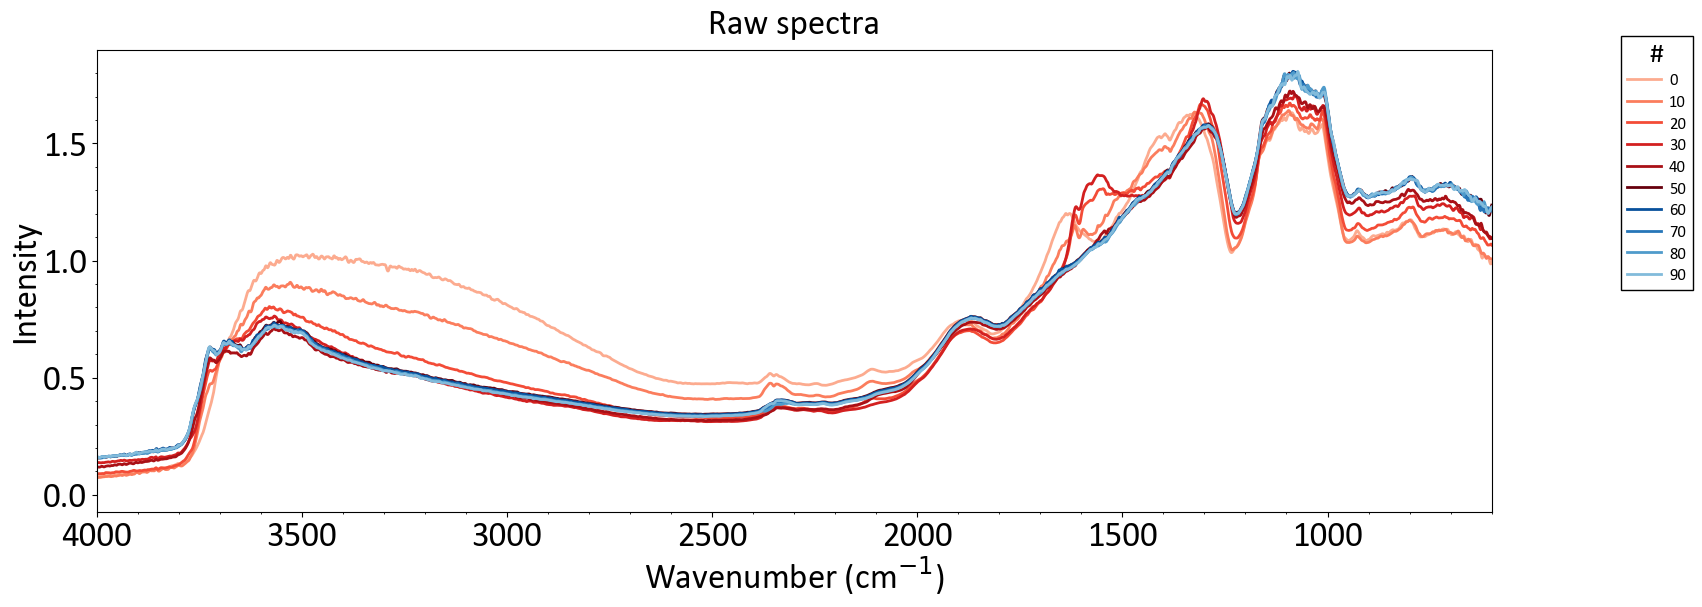

In [80]:
spectra_to_plot = spectra.iloc[:100]
labels_list = None
skip = 10 # show every nth spectrum only
title = 'Raw spectra'
colormap = 'combined'
xlim = (4000, 600)
ylim = None
figsize = (18, 6)

ir.plot_spectra_with_labels(spectra_to_plot, labels_list, skip, title, colormap, folder, xlim = xlim, ylim = ylim, figsize = figsize)

## Define stages in experiment

In [81]:
if metadata['experiment_type'] == 'CO_oxidation':

    # CO oxidation experiment
    if metadata['pretreatment'] == 'H2':
        pretreatment_gas = ir.H2_sp

    elif metadata['pretreatment'] == 'O2':
        pretreatment_gas = ir.O2_sp
    
    else:
        pretreatment_gas = None
    

    # define the reaction gas
    reaction_gas = ir.CO_sp
    reaction_time = merged_data[merged_data[reaction_gas] > 0].index[len(merged_data[merged_data[reaction_gas] > 0].index)//2]

    if pretreatment_gas == ir.H2_sp and reaction_gas == ir.CO_sp:
        pretreatment_time = merged_data[merged_data[pretreatment_gas] > 0].index[len(merged_data[merged_data[pretreatment_gas] > 0].index)//2]

    if pretreatment_gas == ir.O2_sp and reaction_gas == ir.CO_sp:
        pretreatment_time = merged_data[(merged_data[pretreatment_gas] > 0) & (merged_data.index < reaction_time)].index[len(merged_data[(merged_data[pretreatment_gas] > 0) & (merged_data.index < reaction_time)].index)//2]


    if (merged_data.index == reaction_time).sum() == 0:
        raise ValueError('Reaction_time is not in the logfile')

    # The following lines only run if there is a pretreatment.
    if pretreatment_gas != None:
        # if the pretreatment_time and reaction_time are not in the logfile, raise error
        if (merged_data.index == pretreatment_time).sum() == 0:
            raise ValueError('Pretreatment_time is not in the logfile')

    # There are commonly four relevant parts: inert ramp-up, Pre-treatment, inert ramp-down and reaction


    # Define the ramp_up conditions. The time has to be edited manually
        ramp_up_condition = (
            (merged_data[pretreatment_gas] == 0) &
            (merged_data.index < pretreatment_time)
        )
        DF_inert_rampup = merged_data[ramp_up_condition]


        # Define the pre-treatment conditions
        pretreatment_condition = (
            (merged_data[pretreatment_gas] > 0)
        )
        DF_pretreatment = merged_data[pretreatment_condition]


        # Define the inert ramp_down conditions.
        ramp_down_condition = (
            (merged_data[pretreatment_gas] == 0) & 
            (merged_data[reaction_gas] == 0) &
            (merged_data.index > pretreatment_time) &
            (merged_data.index < reaction_time)
        )
        DF_inert_rampdown = merged_data[ramp_down_condition]


        # we use inert rampdown for the background spectrum, so define it that way
        DF_background = DF_inert_rampdown
    
    # If there is no pretreatment, we can specify the background spectra manually by number, or any other condition in merged_data.
    else:
        background_condition = (
            (merged_data['Number'] > 5) &
            (merged_data['Number'] < 15)
        )

        DF_background = merged_data[background_condition]

    # Define the reaction conditions
    reaction_condition = (
        (merged_data[reaction_gas] > 0)
    )
    DF_reaction = merged_data[reaction_condition]
    


# check here if the times are correct

if pretreatment_gas != None:
    print('Inert rampup is from:     {} to {}'.format(DF_inert_rampup.index[0], DF_inert_rampup.index[-1]))
    print('Pretreatment is from:     {} to {}'.format(DF_pretreatment.index[0], DF_pretreatment.index[-1]))
    print('Inert rampdown is from:   {} to {}'.format(DF_inert_rampdown.index[0], DF_inert_rampdown.index[-1]))
print('Reaction is from:         {} to {}'.format(DF_reaction.index[0], DF_reaction.index[-1]))

Inert rampup is from:     2024-09-25 11:09:08 to 2024-09-25 11:47:08
Pretreatment is from:     2024-09-25 11:48:08 to 2024-09-25 12:47:08
Inert rampdown is from:   2024-09-25 12:48:08 to 2024-09-25 13:25:08
Reaction is from:         2024-09-25 13:26:08 to 2024-09-25 20:16:08


## Background correction

In [82]:
# import DF_reaction_bkg if it exists

overwrite_previous = False

if overwrite_previous == False:
    try:
        DF_reaction_bkg = pd.read_csv(folder + '/DF_reaction_bkg.csv', index_col=0)
        DF_reaction_bkg = DF_reaction_bkg.iloc[:, :-1].astype(float)
        DF_reaction_bkg.columns = DF_reaction_bkg.columns.astype(float)
        print('DF_reaction_bkg loaded')
        temp_diffs = pd.read_csv(folder + '/temp_diffs.csv', index_col=0)
        print('temp_diffs loaded')
    except FileNotFoundError:
        DF_reaction_bkg, temp_diffs = ir.background_correct_by_temperature(reaction_spectra = DF_reaction, 
                                        background_spectra = DF_background, 
                                        temp_column = ir.Oven_temp,
                                        return_temp_column = False)

        DF_reaction_bkg.to_csv(folder + '/DF_reaction_bkg.csv')
        pd.Series(temp_diffs).to_csv(folder + '/temp_diffs.csv')

else:
    print('DF_reaction_bkg not loaded, creating new one')
    DF_reaction_bkg, temp_diffs = ir.background_correct_by_temperature(reaction_spectra = DF_reaction, 
                                     background_spectra = DF_background, 
                                     temp_column = ir.Oven_temp,
                                     return_temp_column = False)

    DF_reaction_bkg.to_csv(folder + '/DF_reaction_bkg.csv')
    pd.Series(temp_diffs).to_csv(folder + '/temp_diffs.csv')
    print('DF_reaction_bkg and temp_diffs exported to csv')

reaction_temperature = DF_reaction[ir.Oven_temp]

DF_reaction_bkg loaded
temp_diffs loaded


### Temp differences plot

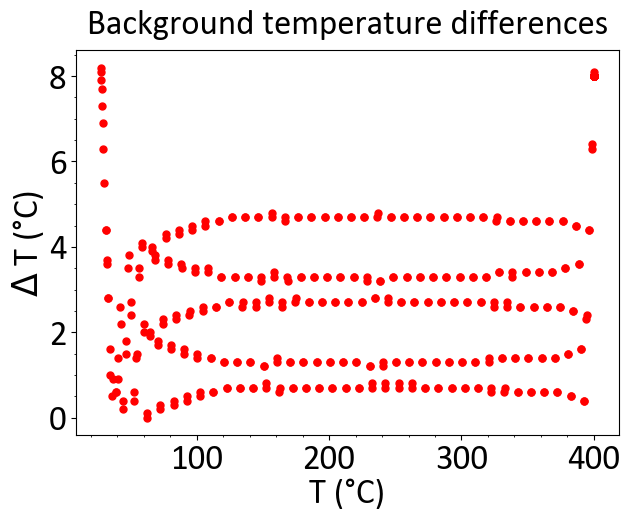

In [83]:
fig, ax = plt.subplots(figsize=(7, 5))

title = 'Background temperature differences'

ax.plot(reaction_temperature, temp_diffs,'.', markersize = 10)

ax.set_xlabel('T (°C)')
ax.set_ylabel(r'$\Delta$ T (°C)')
ax.set_title(title)

fig.savefig(folder + '/temp_diffs', dpi=300, bbox_inches='tight')

### Bkg corrected plot

d:\onedrive - universiteit utrecht\uni\phd\git\drifts-analysis\DRIFTS_package\DRIFTS.py:948: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(spectra_to_plot.columns, spectra_to_plot.iloc[n], label=plot_labels[n], c=colormap[n], **kwargs)


Too many labels (42 > 20), skipping over legend


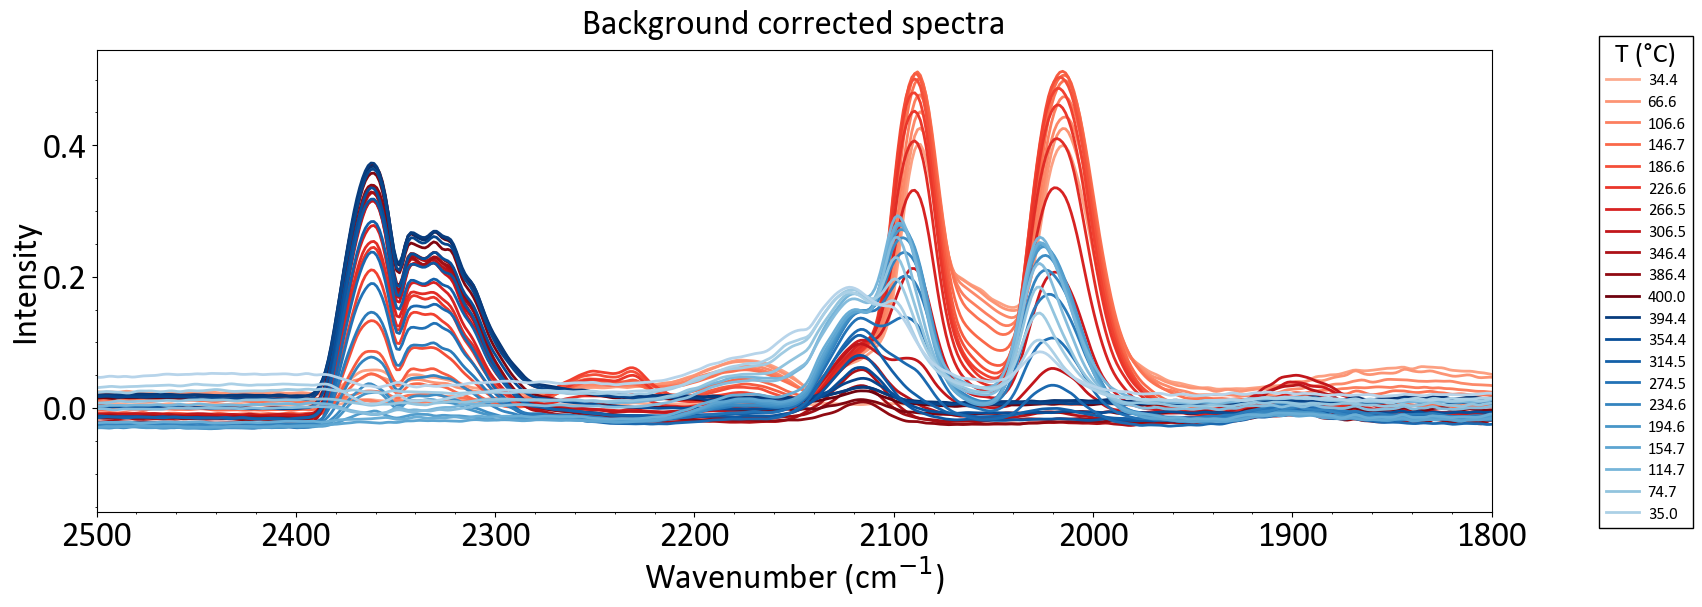

In [84]:
spectra_to_plot = DF_reaction_bkg
labels_list = reaction_temperature
skip = 10 # show every nth spectrum only
title = 'Background corrected spectra'
colormap = 'combined'
xlim = (2500, 1800)
figsize = (18, 6)

ir.plot_spectra_with_labels(spectra_to_plot, labels_list, skip, title, colormap, folder, xlim = xlim, figsize = figsize)

## Baseline subtraction

In [85]:
DF_reaction_bsl1 = ir.linear_baseline_correction(DF_reaction_bkg, 'v1')
DF_reaction_bsl2 = ir.linear_baseline_correction(DF_reaction_bkg, 'v2', area = [2600, 1800])

d:\onedrive - universiteit utrecht\uni\phd\git\drifts-analysis\DRIFTS_package\DRIFTS.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_area.iloc[n,:] = selected_area.copy().iloc[n,:] - linear_baseline_v2[n]


### Baseline v1 plot

d:\onedrive - universiteit utrecht\uni\phd\git\drifts-analysis\DRIFTS_package\DRIFTS.py:948: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(spectra_to_plot.columns, spectra_to_plot.iloc[n], label=plot_labels[n], c=colormap[n], **kwargs)


Too many labels (42 > 20), skipping over legend


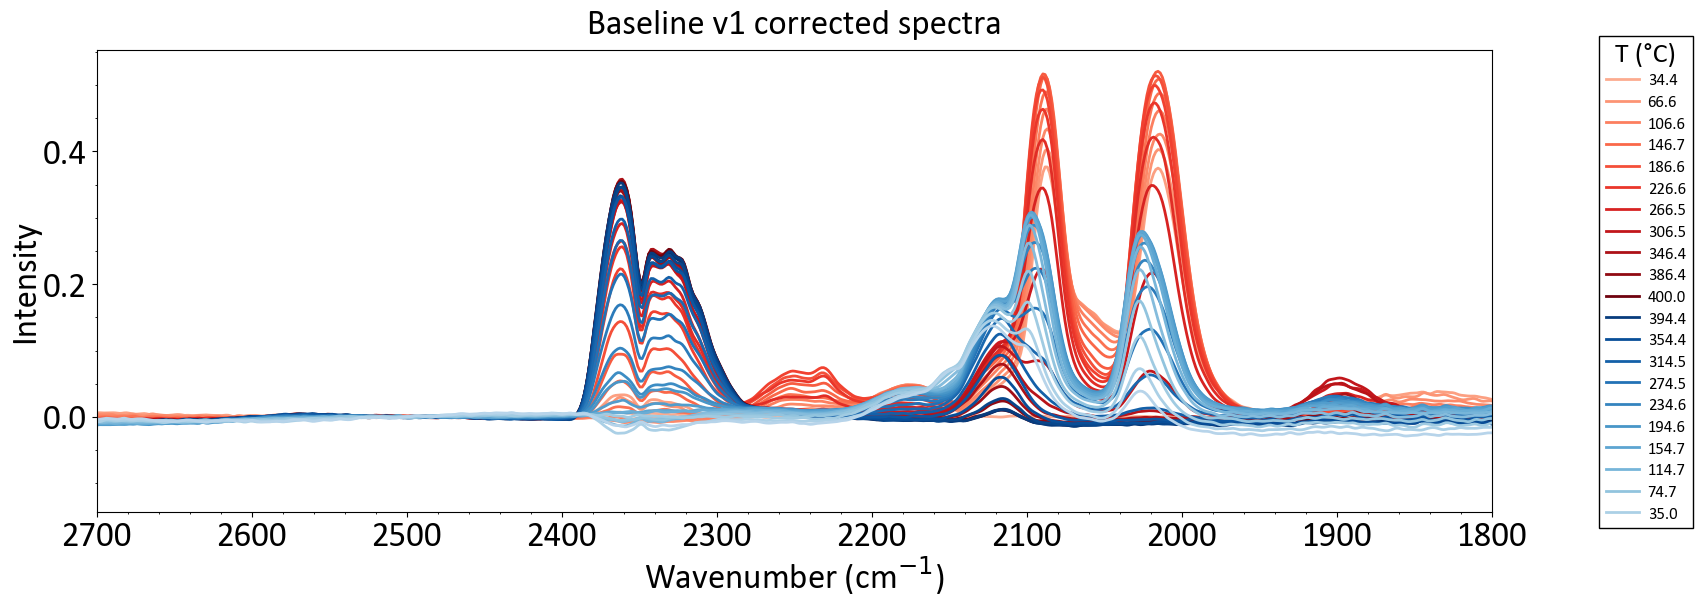

In [86]:
spectra_to_plot = DF_reaction_bsl1
labels_list = reaction_temperature
skip = 10 # show every nth spectrum only
title = 'Baseline v1 corrected spectra'
colormap = 'combined'
xlim = (2700, 1800)
figsize = (18, 6)

ir.plot_spectra_with_labels(spectra_to_plot, labels_list, skip, title, colormap, folder, xlim = xlim, figsize = figsize)

### Baseline v2 plot

Too many labels (42 > 20), skipping over legend


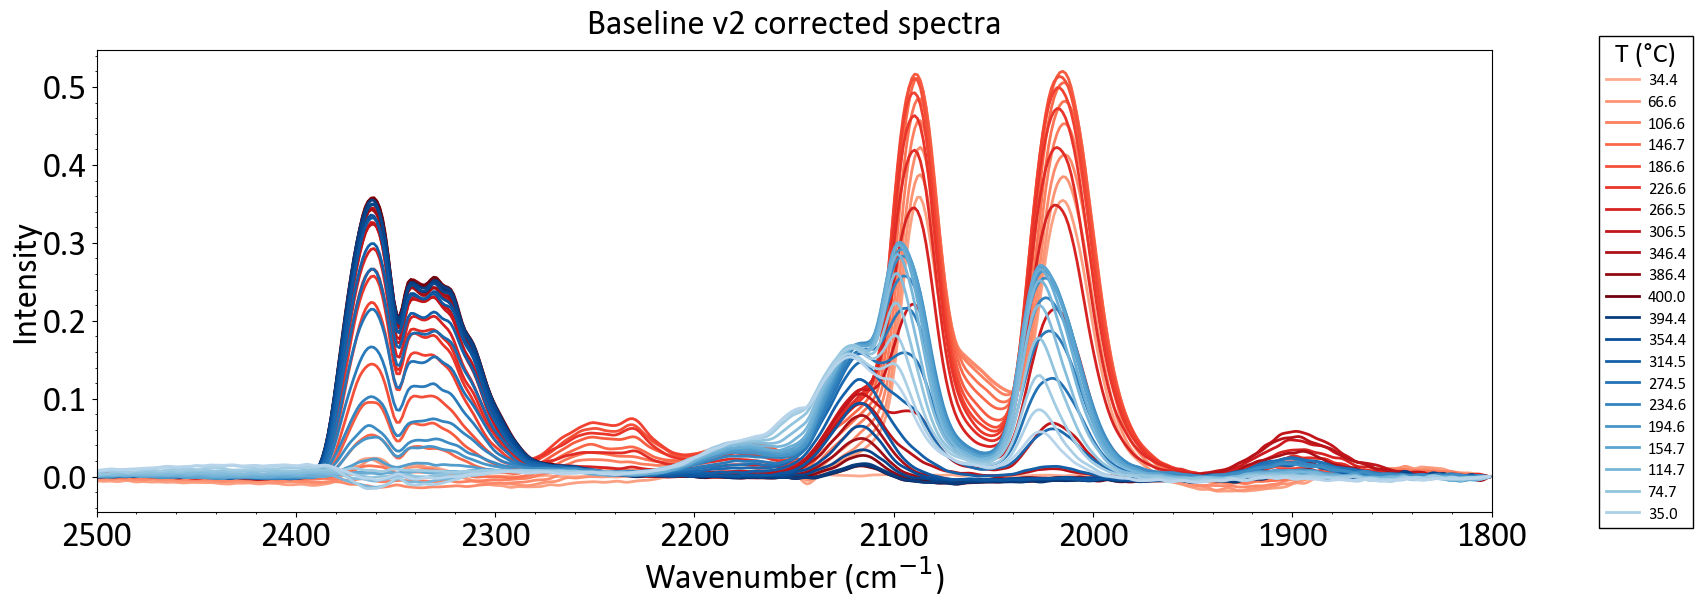

In [87]:
spectra_to_plot = DF_reaction_bsl2
labels_list = reaction_temperature
skip = 10 # show every nth spectrum only
title = 'Baseline v2 corrected spectra'
colormap = 'combined'
xlim = (2500, 1800)
figsize = (18, 6)

ir.plot_spectra_with_labels(spectra_to_plot, labels_list, skip, title, colormap, folder, xlim = xlim, figsize = figsize)

## Lightoff and lightout splitting

In [88]:
DF_lightoff_bsl1, temperatures_lightoff, DF_lightout_bsl1, temperatures_lightout = ir.split_lightoff_lightout(DF_reaction_bsl1, reaction_temperature)
DF_lightoff_bsl2, temperatures_lightoff, DF_lightout_bsl2, temperatures_lightout = ir.split_lightoff_lightout(DF_reaction_bsl2, reaction_temperature)

Lightoff and lightout temperatures match
Lightoff and lightout temperatures match


### Export

In [89]:
# Exporting the baseline corrected data
DF_lightoff_bsl1.to_csv(folder + '/DF_lightoff_bsl1.csv')
DF_lightout_bsl1.to_csv(folder + '/DF_lightout_bsl1.csv')
temperatures_lightoff.to_csv(folder + '/temperatures_lightoff.csv')

DF_lightoff_bsl2.to_csv(folder + '/DF_lightoff_bsl2.csv')
DF_lightout_bsl2.to_csv(folder + '/DF_lightout_bsl2.csv')
temperatures_lightout.to_csv(folder + '/temperatures_lightout.csv')

### Lightoff plots

#### complete

Too many labels (21 > 20), skipping over legend


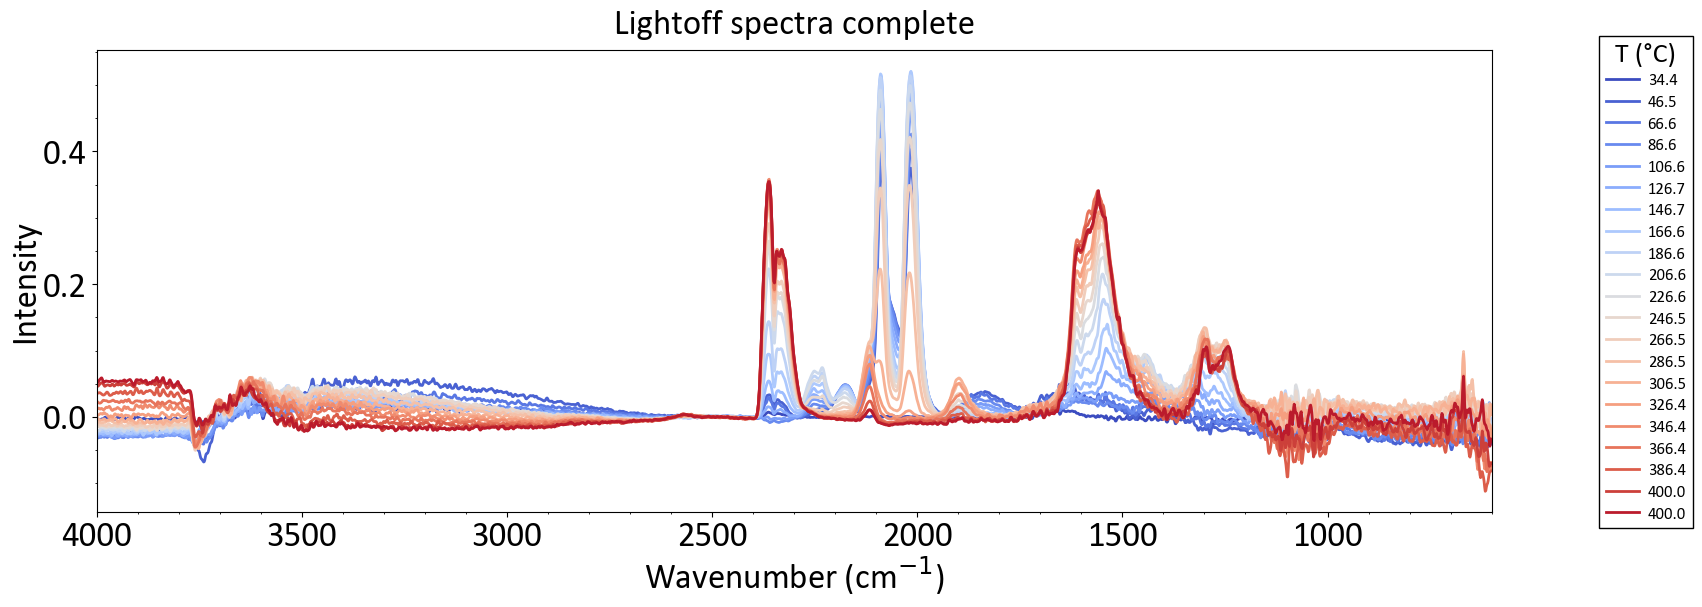

In [90]:
spectra_to_plot = DF_lightoff_bsl1
labels_list = temperatures_lightoff
skip = 10 # show every nth spectrum only
title = 'Lightoff spectra complete'
colormap = 'lightoff'
xlim = (4000, 600)
figsize = (18, 6)

ir.plot_spectra_with_labels(spectra_to_plot, labels_list, skip, title, colormap, folder, xlim = xlim, figsize = figsize)

#### CO area

Too many labels (41 > 20), skipping over legend


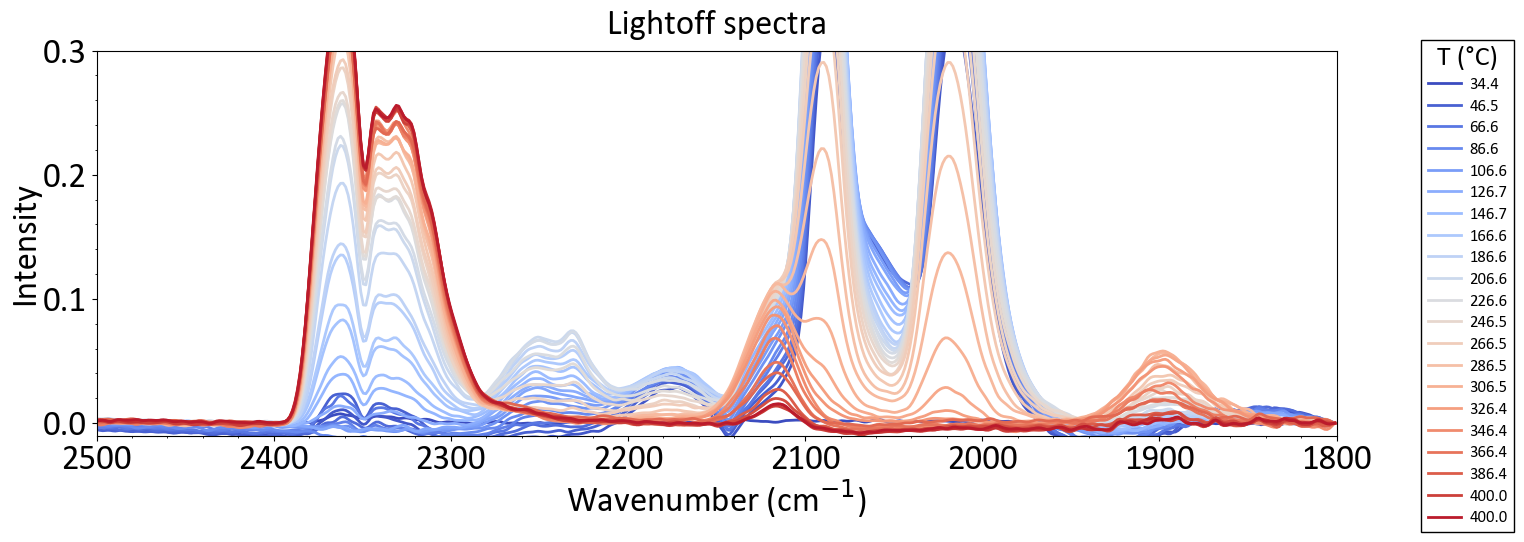

In [91]:
spectra_to_plot = DF_lightoff_bsl2
labels_list = temperatures_lightoff
skip = 5 # show every nth spectrum only
title = 'Lightoff spectra'
colormap = 'lightoff'
xlim = (2500, 1800)
ylim = (-0.01, 0.3)
figsize = (16, 5)

ir.plot_spectra_with_labels(spectra_to_plot, labels_list, skip, title, colormap, folder, xlim = xlim, figsize = figsize, ylim = ylim)

### Lightout plots

#### complete

Too many labels (21 > 20), skipping over legend


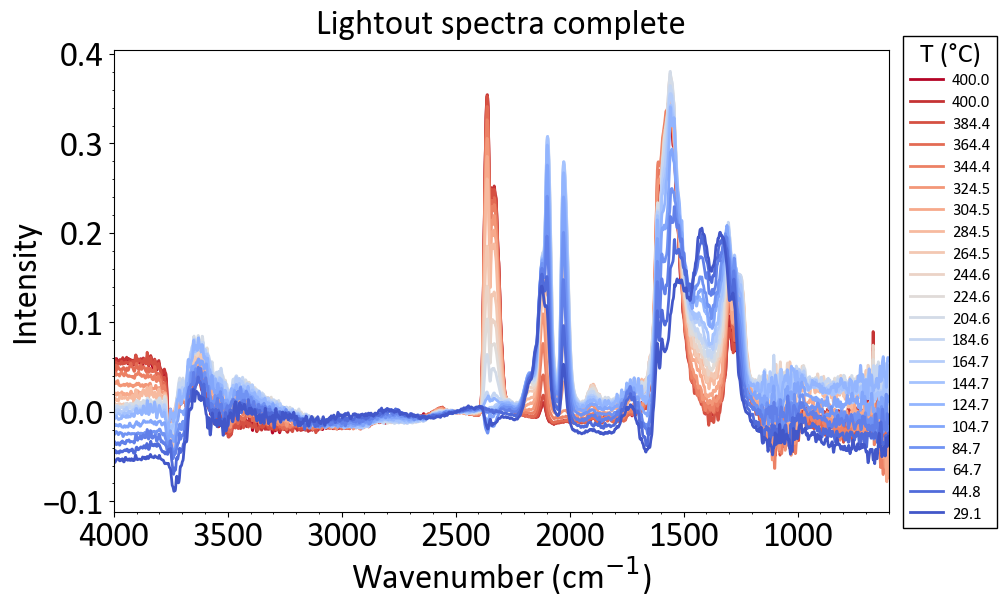

In [92]:
spectra_to_plot = DF_lightout_bsl1
labels_list = temperatures_lightout
skip = 10 # show every nth spectrum only
title = 'Lightout spectra complete'
colormap = 'lightout'
xlim = (4000, 600)
figsize = (10, 6)

ir.plot_spectra_with_labels(spectra_to_plot, labels_list, skip, title, colormap, folder, xlim = xlim, figsize = figsize)

#### CO area

Too many labels (42 > 20), skipping over legend


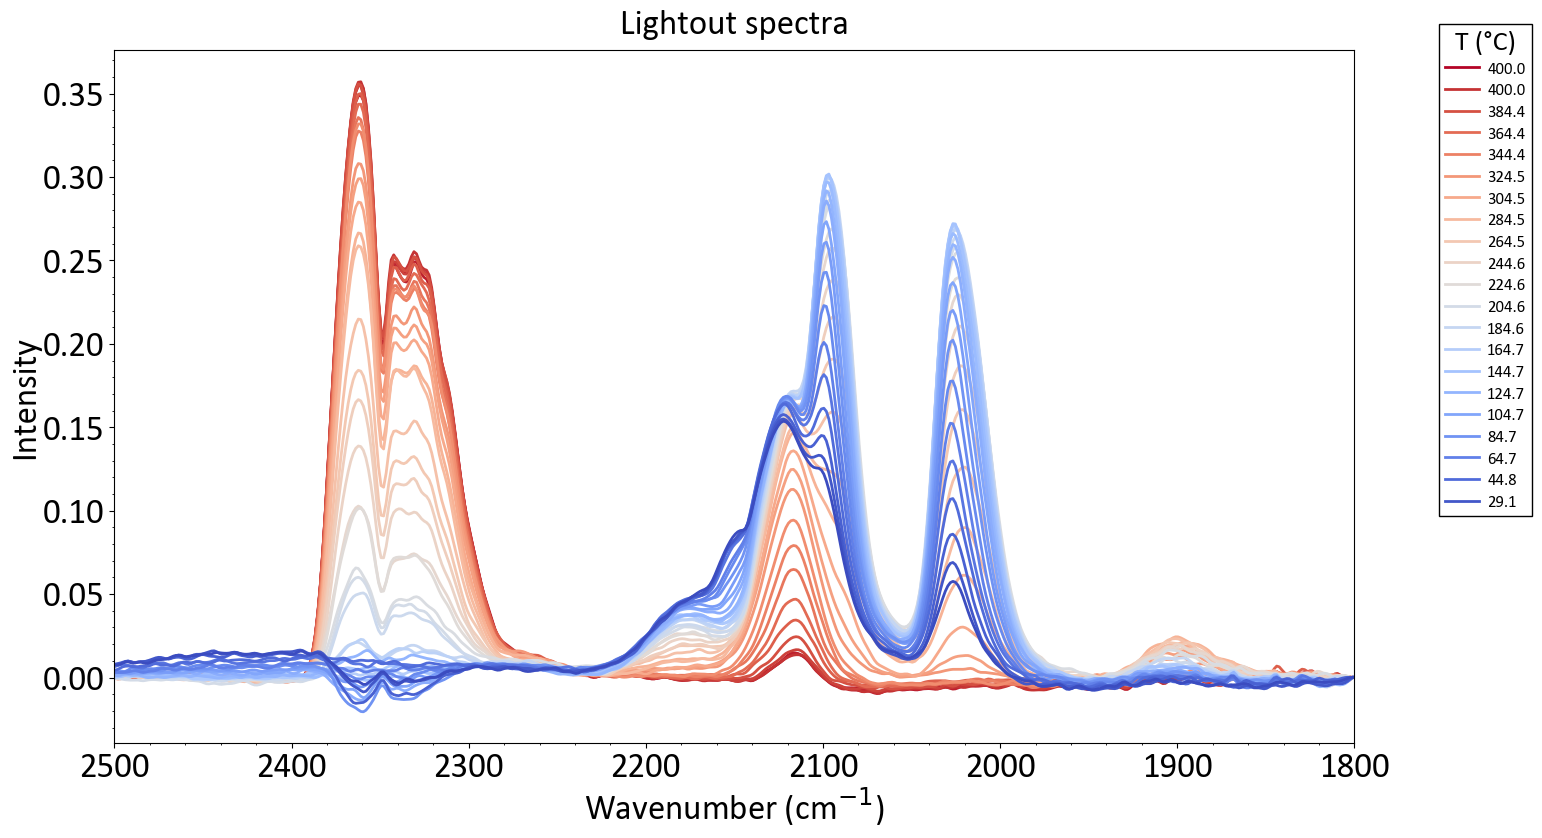

In [93]:
spectra_to_plot = DF_lightout_bsl2
labels_list = temperatures_lightout
skip = 5 # show every nth spectrum only
title = 'Lightout spectra'
colormap = 'lightout'
xlim = (2500, 1800)
figsize = (16, 9)

ir.plot_spectra_with_labels(spectra_to_plot, labels_list, skip, title, colormap, folder, xlim = xlim, figsize = figsize)

## Logfile: gas analysis

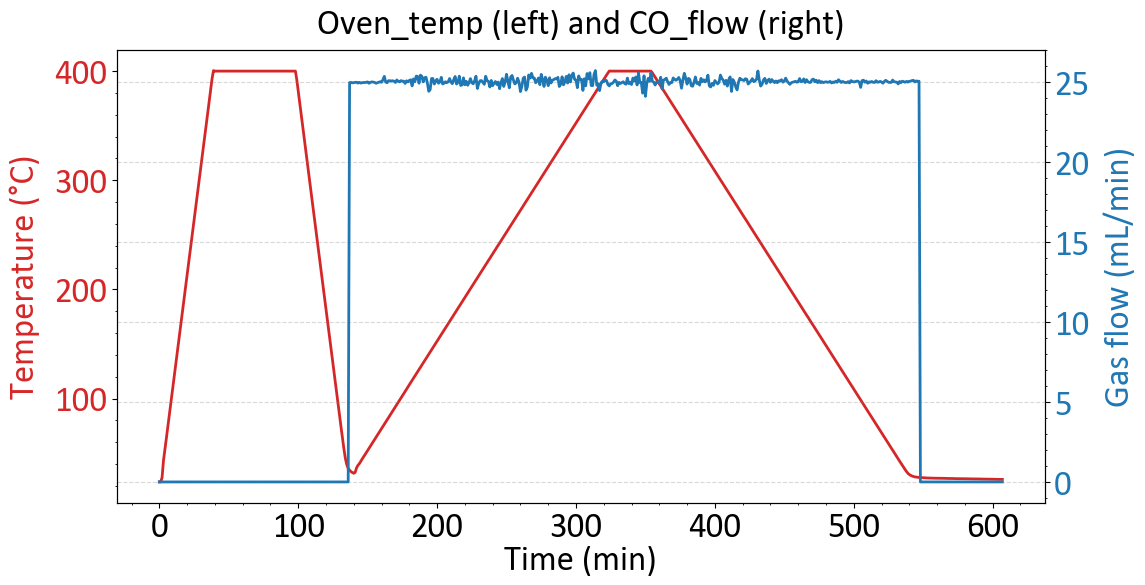

In [94]:
ir.gas_analysis_plot(merged_data, folder = folder, gas_flow = ir.CO_flow)

## GC analysis

### Import GC data and merge

In [95]:
if gc_location:
    gc_data = ir.import_gc_data_and_merge(gc_location, logfile)
    gc_data.head()
    
    reaction_start, reaction_end = merged_data[merged_data[ir.CO_sp]>0].index[0], merged_data[merged_data[ir.CO_sp]>0].index[-1]
    reaction_date = reaction_start.date().strftime('%Y-%m-%d')

    print('The reaction starts at:  ', reaction_start)
    print('The reaction ends at:    ', reaction_end)
    print('\nThe reaction date is:    ', reaction_date)
    
    gc_data_reaction = gc_data[(gc_data.index >= reaction_start) & (gc_data.index <= reaction_end)].copy()


Found logfile, merging with GC data.
The reaction starts at:   2024-09-25 13:26:08
The reaction ends at:     2024-09-25 20:16:08

The reaction date is:     2024-09-25


### Plot CO conversion over time

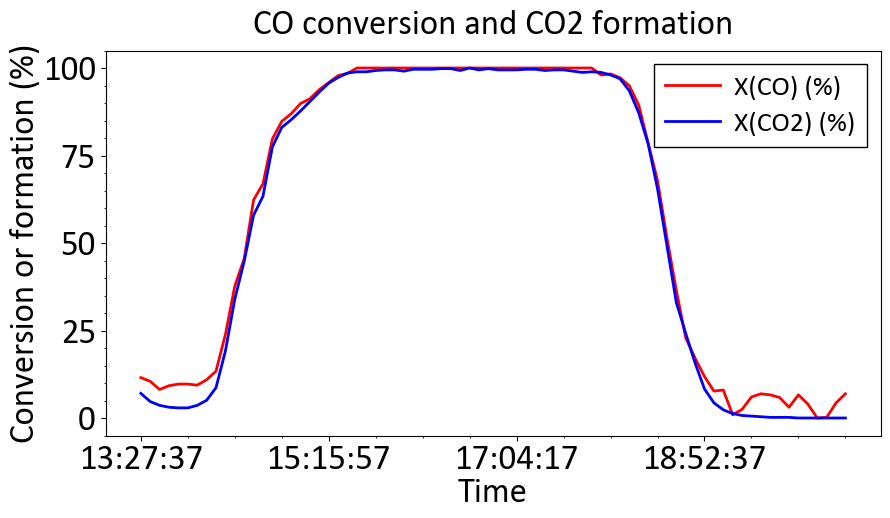

In [96]:
ir.plot_COox_conversion(gc_data_reaction, reaction_start, reaction_end, folder = folder) if gc_location else None

### Plot light-off and light-out curves

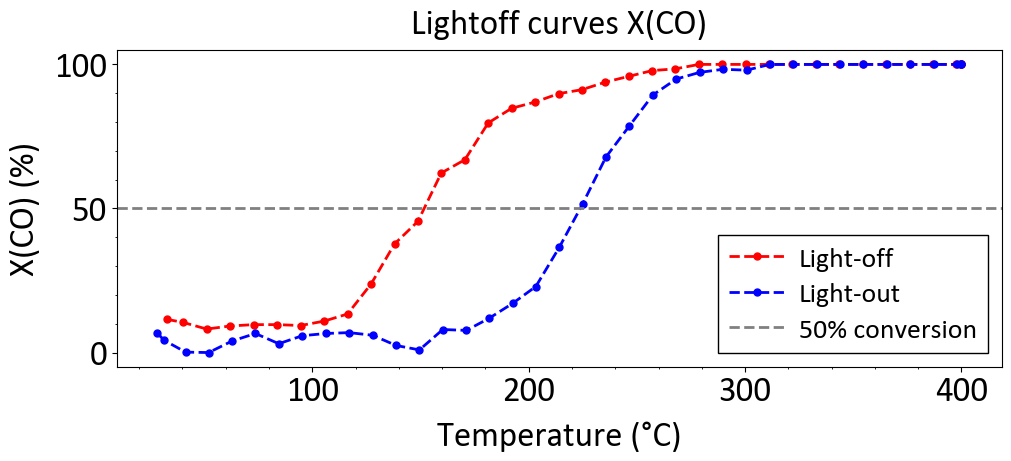

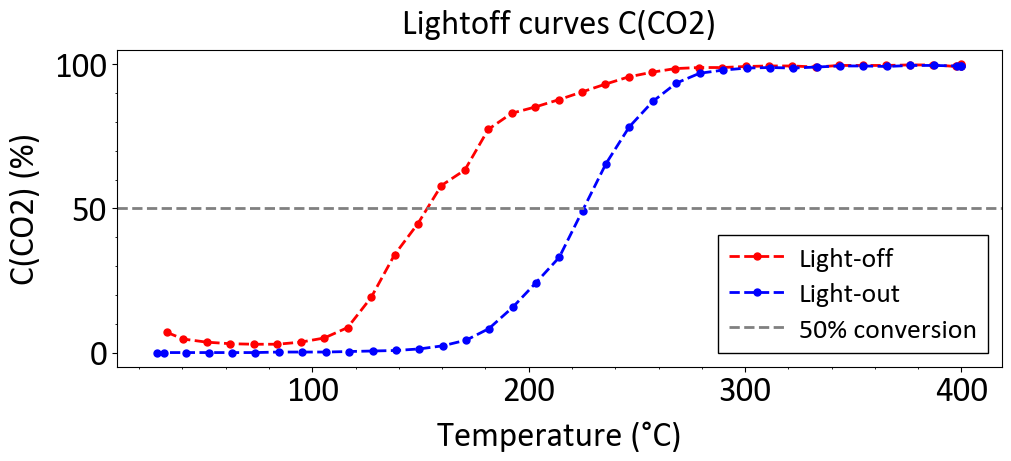

In [97]:
if gc_location:
    gc_lightoff = gc_data_reaction.iloc[:len(gc_data_reaction)//2]
    gc_lightout = gc_data_reaction.iloc[len(gc_data_reaction)//2:]

    ir.plot_lightoff(gc_lightoff, gc_lightout, folder, 'CO')
    ir.plot_lightoff(gc_lightoff, gc_lightout, folder, 'CO2')

### Estimate lightoff and lightout temperatures

In [98]:
# Lightoff temperature
if gc_location:
    
    lightoff_temperature_low = gc_lightoff[(gc_lightoff['X(CO)'] < 0.5) & (gc_lightoff[ir.Oven_temp] > 80) & (gc_lightoff[ir.Oven_temp] < 350)][ir.Oven_temp].iloc[-1]
    lightoff_temperature_high = gc_lightoff[(gc_lightoff['X(CO)'] > 0.5) & (gc_lightoff[ir.Oven_temp] > 80) & (gc_lightoff[ir.Oven_temp] < 350)][ir.Oven_temp].iloc[0]

    print('Lightoff temperature is between {} and {} °C'.format(lightoff_temperature_low, lightoff_temperature_high))
    print('Averaged, this is {} °C'.format(round((lightoff_temperature_low + lightoff_temperature_high)/2)))

    T_lightoff_GC = round((lightoff_temperature_low + lightoff_temperature_high)/2)
else:
    T_lightoff_GC = None

Lightoff temperature is between 148.8 and 159.6 °C
Averaged, this is 154 °C


In [99]:
# Lightout temperature
if gc_location:
    
    lightout_temperature_low = gc_lightout[(gc_lightout['X(CO)'] < 0.5) & (gc_lightout[ir.Oven_temp] > 80) & (gc_lightout[ir.Oven_temp] < 350)][ir.Oven_temp].iloc[0]
    lightout_temperature_high = gc_lightout[(gc_lightout['X(CO)'] > 0.5) & (gc_lightout[ir.Oven_temp] > 80) & (gc_lightout[ir.Oven_temp] < 350)][ir.Oven_temp].iloc[-1]

    print('Lightout temperature is between {} and {} °C'.format(lightout_temperature_low, lightout_temperature_high))
    print('Averaged, this is {} °C'.format((round(lightout_temperature_low + lightout_temperature_high)/2)))

    T_lightout_GC = round((lightout_temperature_low + lightout_temperature_high)/2)
else:
    T_lightout_GC = None

Lightout temperature is between 214.1 and 224.9 °C
Averaged, this is 219.5 °C


### Export GC data

In [100]:
# export the GC data for later use and name it the folder name
gc_data_reaction.to_csv(folder + '/' + 'GC_data_merged.csv') if gc_location else None

## IR analysis

### Plot CO and CO2 peak heights

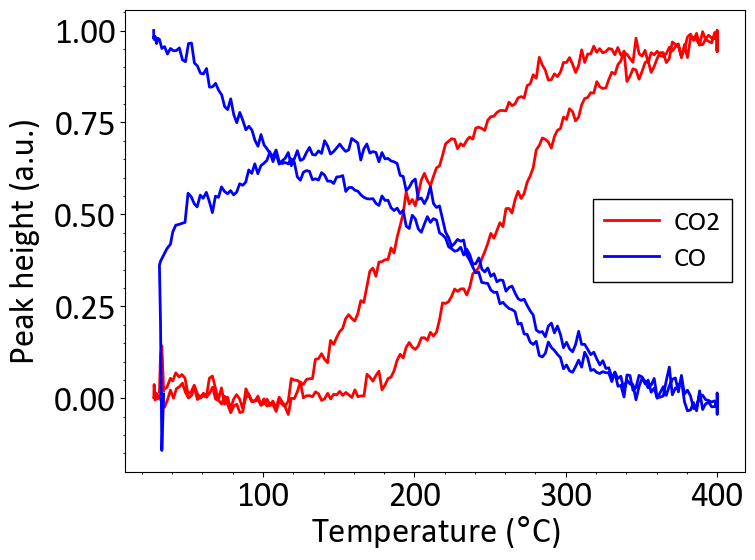

In [101]:
CO2_peakheights = ir.get_maximum_peak(ir.normalize_on_peak(DF_reaction_bsl2.iloc[:], ir.CO2_peak_range, temp = False), ir.CO2_peak_range, temp = False)
CO2_peakheights.index = reaction_temperature

CO_peakheights = ir.get_maximum_peak(ir.normalize_on_peak(DF_reaction_bsl2.iloc[:], ir.CO_peak_range, temp = False), ir.CO_peak_range, temp = False)
CO_peakheights.index = reaction_temperature

fig, ax = plt.subplots(figsize=(8, 6))

title = 'CO2 and CO peak heights'

ax.plot(CO2_peakheights, label='CO2', c='red')
ax.plot(CO_peakheights, label='CO', c='blue')

ax.set_xlabel(r'Temperature ($\degree$C)')
ax.set_ylabel('Peak height (a.u.)', labelpad=10)

ax.legend(loc='center right')

fig.savefig(folder + '/' + title+'.png', dpi=300, bbox_inches='tight')

plt.show()

### Estimate lightoff and lightout temperatures

In [102]:
CO2_peakheights_lightoff = CO2_peakheights.iloc[:(len(CO2_peakheights)//2)]
CO2_peakheights_lightout = CO2_peakheights.iloc[(len(CO2_peakheights)//2):]

CO_peakheights_lightoff = CO_peakheights.iloc[:(len(CO_peakheights)//2)]
CO_peakheights_lightout = CO_peakheights.iloc[(len(CO_peakheights)//2):]

In [103]:
IR_lightoff_CO2, IR_lightout_CO2, IR_lightoff_CO, IR_lightout_CO = ir.get_lightoff_lightout_temperatures(CO2_peakheights_lightoff, CO2_peakheights_lightout, CO_peakheights_lightoff, CO_peakheights_lightout)

CO2 lightoff temperature is between 190.6 and 192.6 °C
Averaged, this is 192 °C
CO2 lightout temperature is between 260.5 and 258.5 °C
Averaged, this is 260 °C
CO lightoff temperature is between 218.6 and 216.6 °C
Averaged, this is 218 °C
CO lightout temperature is between 192.6 and 194.6 °C
Averaged, this is 194 °C

Average lightoff temperature is 205 °C
Average lightout temperature is 227 °C


## Summary of results

### Combined IR and GC lightoff plot

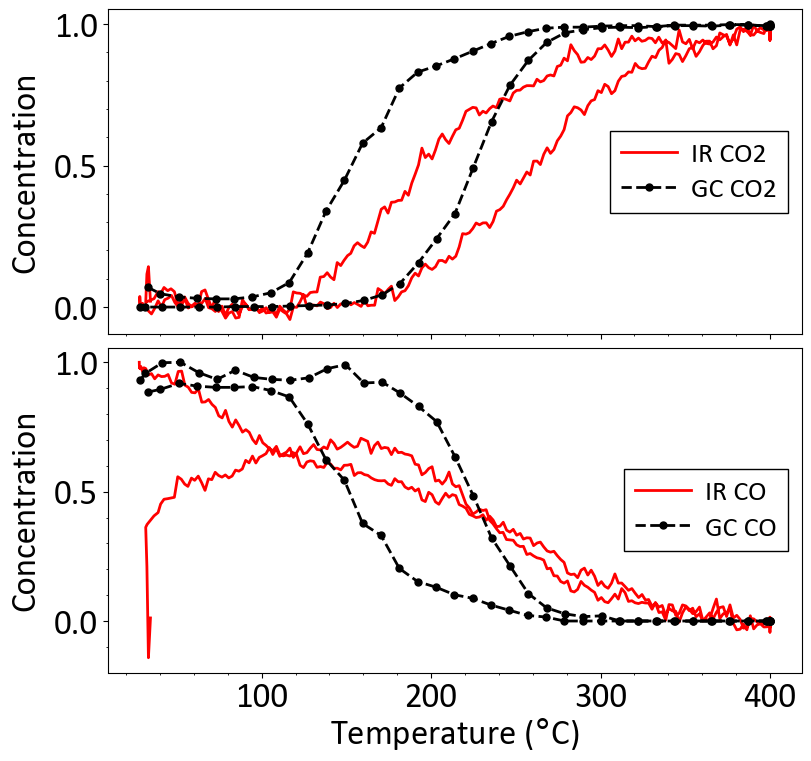

In [104]:
if gc_location:
    fig, ax = plt.subplots(2, figsize=(8, 7.5), sharex=True, constrained_layout=True)

    title = 'Combined IR and GC lightoff plot'

    ax[0].plot(CO2_peakheights, label='IR CO2', c='red')
    ax[1].plot(CO_peakheights, label='IR CO', c='red')

    ax[0].plot(gc_data_reaction[ir.Oven_temp], gc_data_reaction['X(CO2)'], 'o--', markersize = 5, c= 'black', label ='GC CO2')

    ax[1].plot(gc_data_reaction[ir.Oven_temp], 1- gc_data_reaction['X(CO)'], 'o--', markersize = 5, c= 'black', label ='GC CO')


    for ax in ax.flat:
        ax.set_xlabel(r'Temperature ($\degree$C)')
        ax.set_ylabel('Concentration', labelpad=10)

        ax.legend(loc='center right')
        ax.label_outer()

    fig.savefig(folder + '/' + title+'.png', dpi=300, bbox_inches='tight')

    plt.show()

### All lightoff and lightout temperatures

In [105]:
ir.append_lightoff(experiment_name = metadata['folder_name'], GC_lightoff= T_lightoff_GC, GC_lightout = T_lightout_GC, IR_lightoff_CO2 = IR_lightoff_CO2, IR_lightout_CO2 = IR_lightout_CO2, IR_lightoff_CO = IR_lightoff_CO, IR_lightout_CO = IR_lightout_CO)

Entry already exists, overwriting...
Entry overwritten: DRIFTS OOP script example data


,Lightoff GC,Lightoff IR (CO),Lightoff IR (CO2),Lightout GC,Lightout IR (CO),Lightout IR (CO2)
240924 Ra01perp_COox_001,154.0,218.0,192.0,220.0,194.0,260.0
241128 Ra01washcoat_COox_001 (JG025),181.0,172.0,142.0,214.0,188.0,192.0
241200 Ra01_COox_001 (JG005) lightoff fresh red PT (lowest lightoff),133.0,230.0,196.0,220.0,176.0,260.0
241202 Ra01_COox_002 (JG022) lightoff air aged red PT,187.0,200.0,198.0,252.0,218.0,242.0
250128 Ra01_COox_003 (JG027) Lightout repeat,130.0,151.0,177.0,211.0,133.0,246.0
250212 Ra01_COox_004 (JG028) Ra01 HT treatment BASF,154.0,215.0,179.0,241.0,242.0,266.0
250317 Ra01_COox_005 air aged 950C 12h,215.0,223.0,223.0,266.0,256.0,280.0
250424 Ra01_COox_006 reverse gas flow,NaN,135.0,137.0,NaN,194.0,204.0
250428 Ra01_COox_007 crushed core,170.0,157.0,159.0,213.0,210.0,220.0
250429 Ra01_COox_008 reverse gas Repeat,148.0,135.0,135.0,193.0,190.0,202.0
